<a href="https://colab.research.google.com/github/Rumsha001/ML-Project/blob/main/RealEstate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**

**Group Members:**

1.   Ramsha Arif (23395)
2.   Sarosh Aamir (23390)


In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data cleaning pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



# **Data Preparation**

In [ ]:
# loading data set

git_url_train='https://raw.githubusercontent.com/Rumsha001/ML-Project/main/train.csv'
git_url_test='https://raw.githubusercontent.com/Rumsha001/ML-Project/main/train.csv'

df_train = pd.read_csv(git_url_train)
df_test = pd.read_csv(git_url_test)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Data Exploration**

## **Identifying the number of features or columns**

In [ ]:
#checking the number of features in the Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,'\n', len(df_train.columns))




Number of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 81


## **Identifying the data types of features**

In [ ]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", df_train.dtypes )




Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


## **Check summary of 'Sale price' feature**

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## **Plotting Histogram of 'Sale Price'**

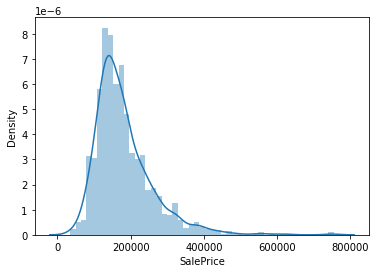

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

## **Exploring Relationship with Numerical Values**

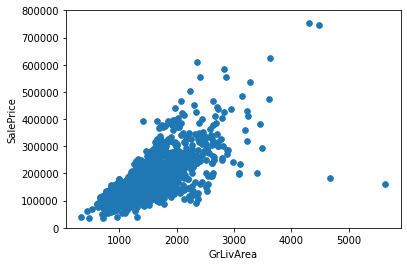

In [ ]:
#scatter plot grlivarea/saleprice
# GrLivArea: Above grade (ground) living area square feet
#relationship with numerical

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

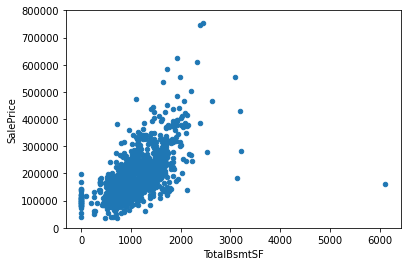

In [ ]:
#scatter plot totalbsmtsf/saleprice
#TotalBsmtSF: Total square feet of basement area

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## **Exploring Relationship with Categorical features**

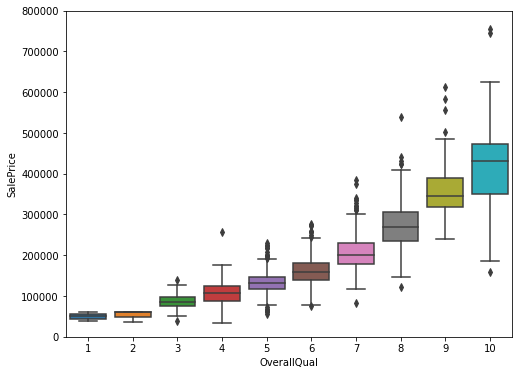

In [ ]:
#box plot overallqual/saleprice
#OverallQual: Rates the overall material and finish of the house on the scale 1 to 10
# 1 rates 'poor' while 10 rates 'very excellent'
#Relationship with categorical features

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## **Plotting Sale Price w.r.t Year Built**

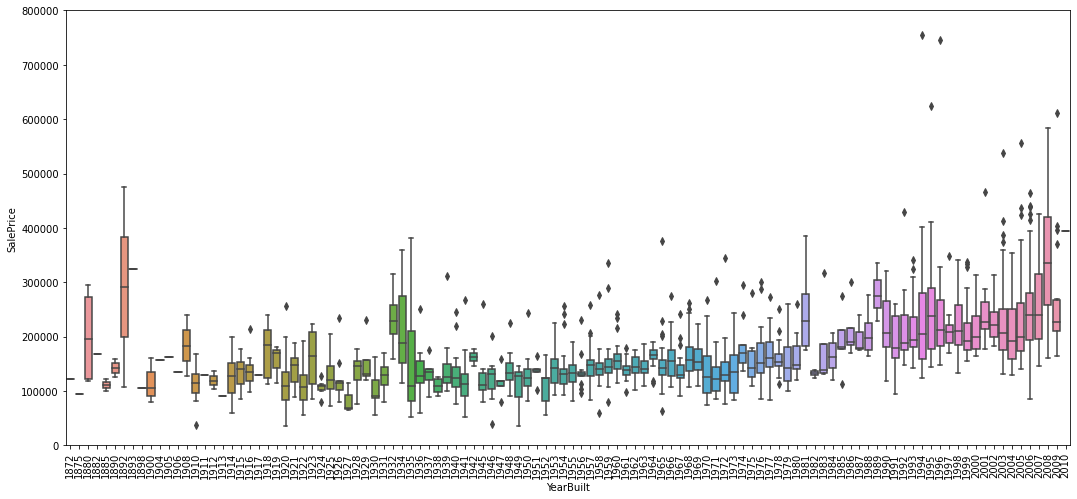

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## **Plotting Correlation between each variable and SalePrice**

To explore the dataset in depth, we will try to visualize the data in a more meaningful manner:

1.   Correation matrix (heatmap style)
2.   'SalePrice' correlation matrix (zoomed heatmap style).
3.   Scatter plots between the most correlated variables (move like Jagger style).



## **Correlation matrix (heatmap style)**

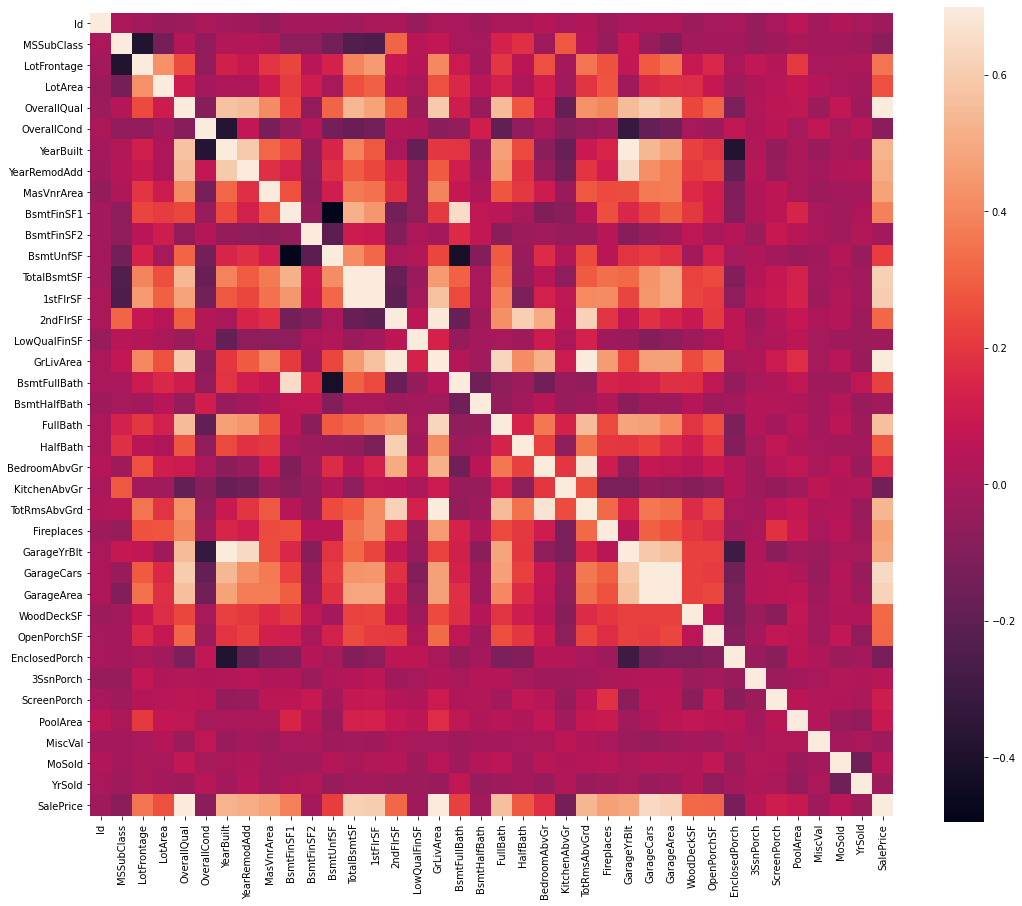

In [ ]:
# Create a heatmap to display correlations between each variable
# Graphical representation of data where the individual values contained in a matrix are represented as colors.

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat, vmax=.7, square=True);

Zoom

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


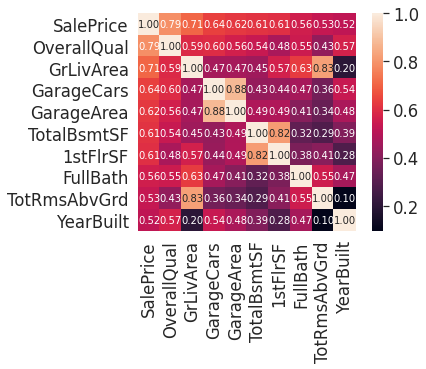

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
imp_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(imp_cols.values)
cm = np.corrcoef(df_train[imp_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=imp_cols.values, xticklabels=imp_cols.values)
plt.show()

## **Scatter plots between 'SalePrice' and correlated variables**

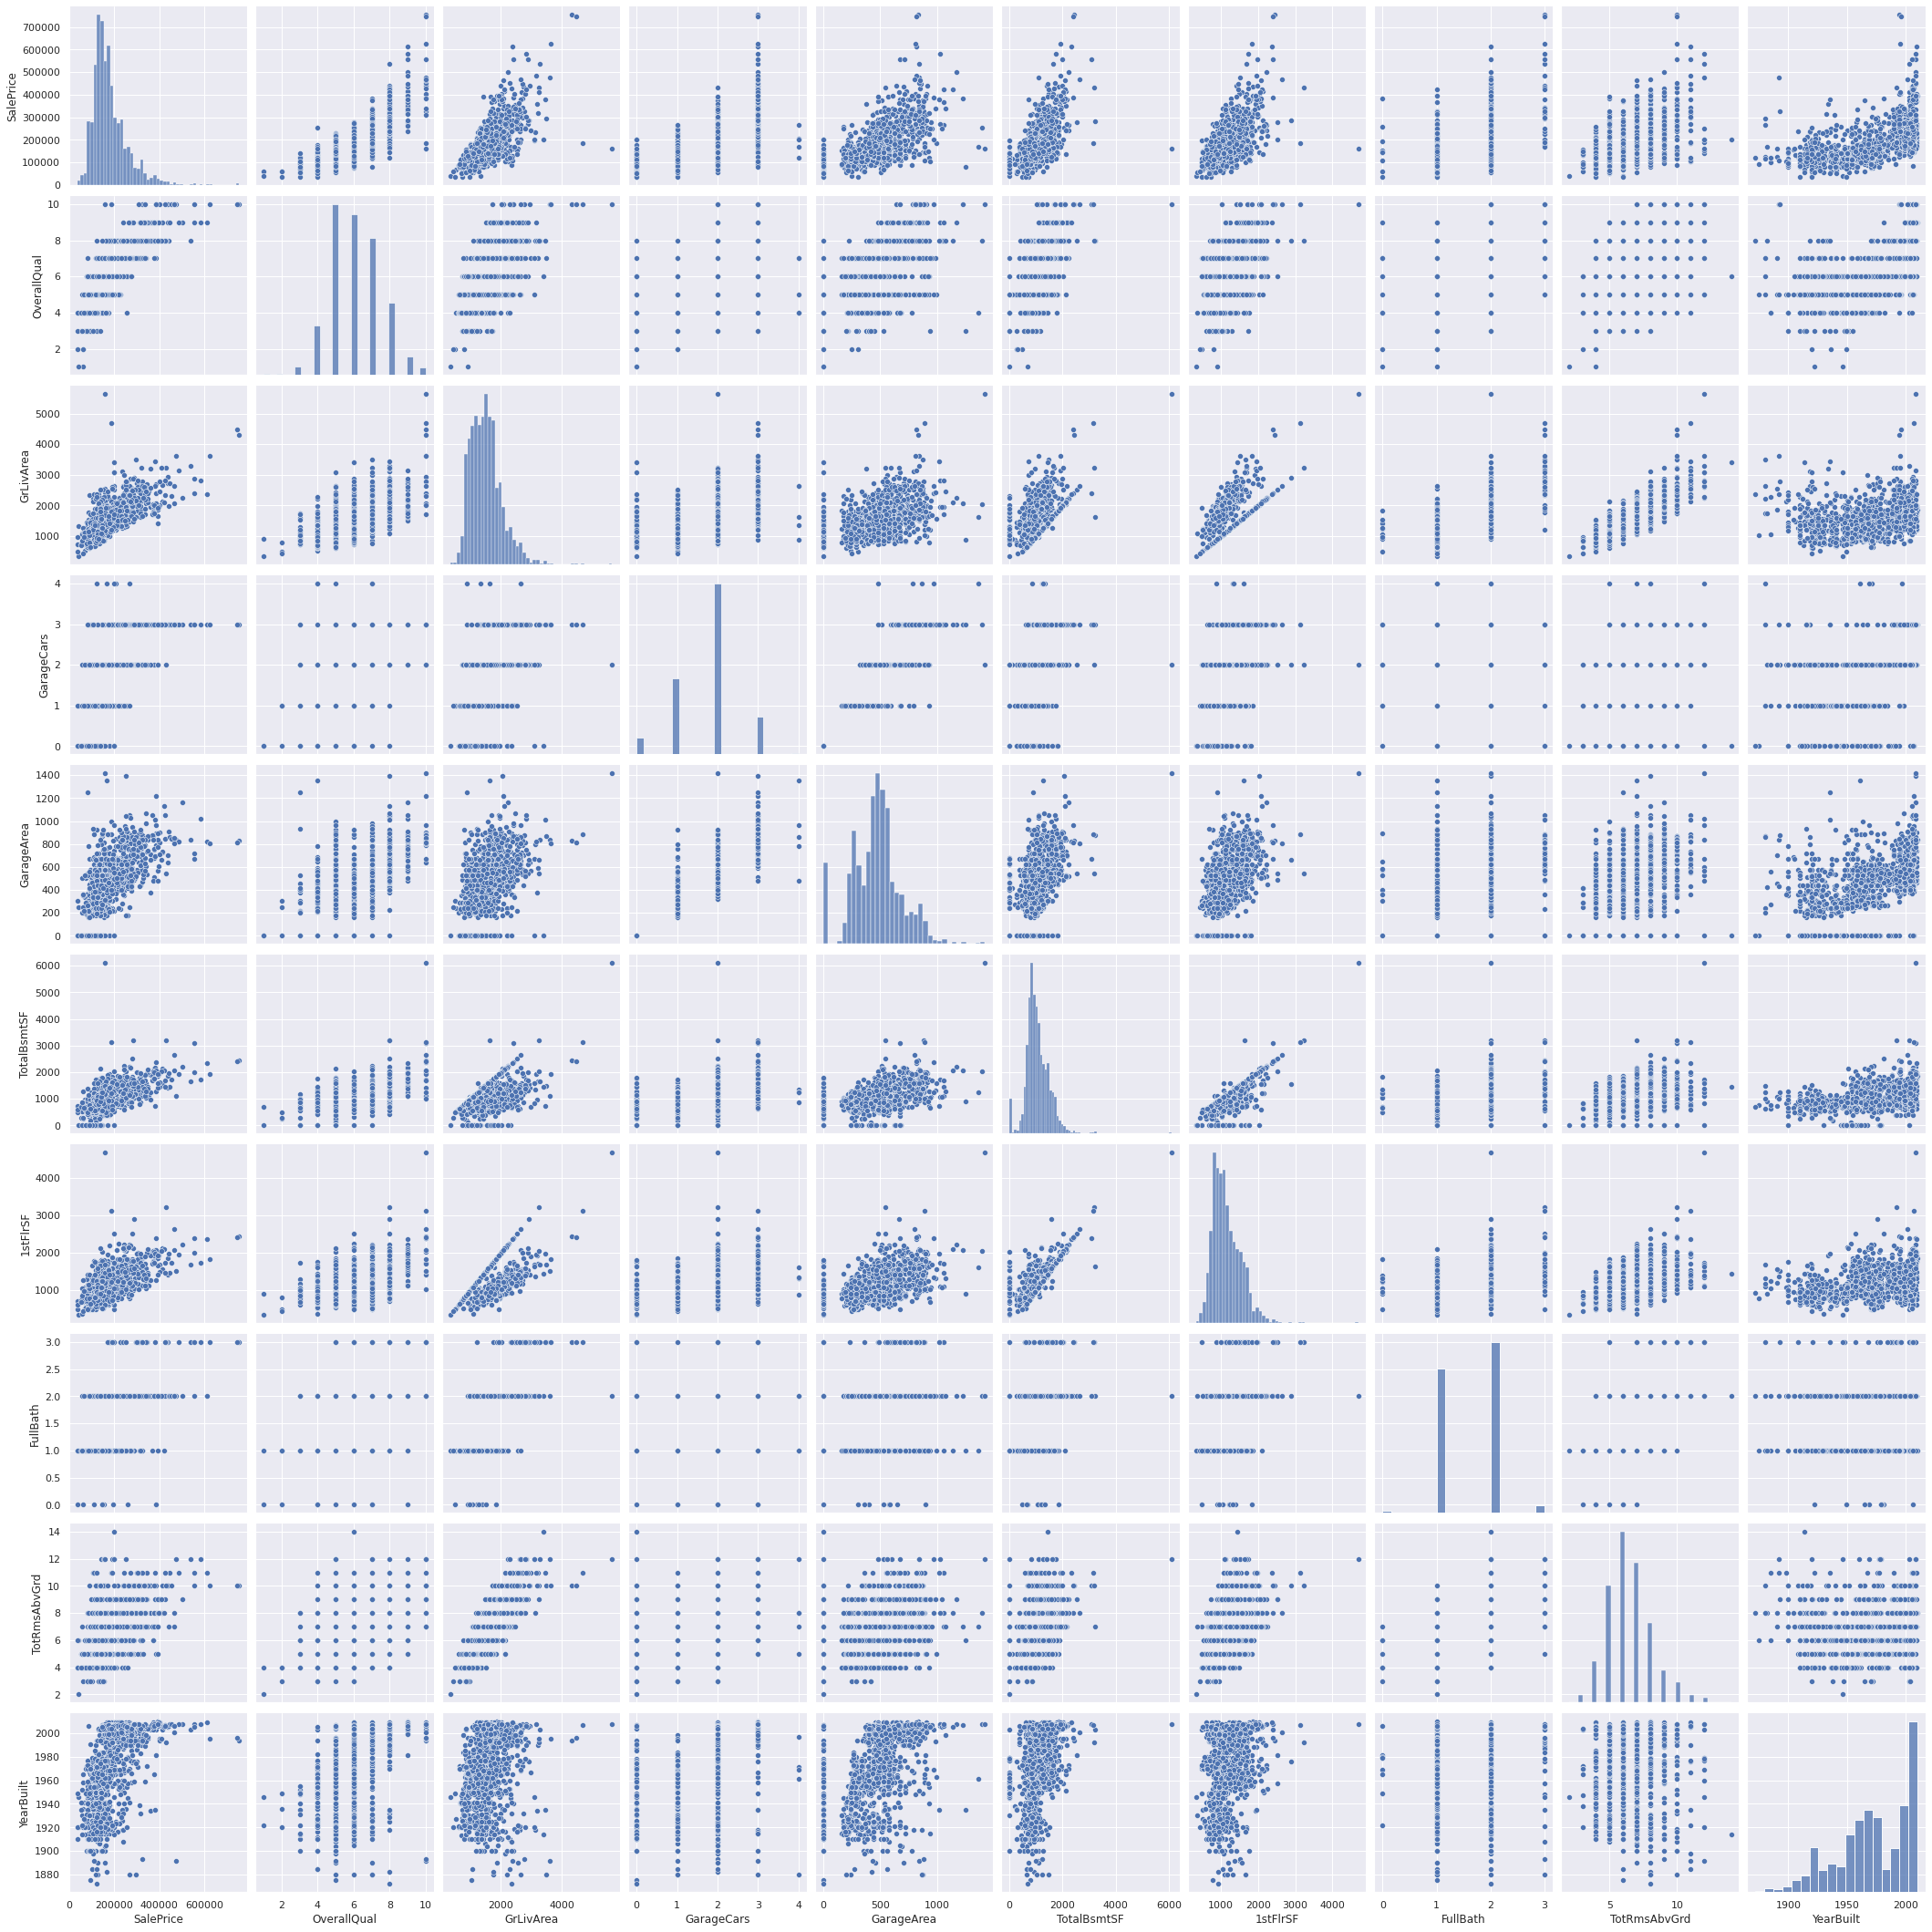

In [ ]:
#scatterplot
sns.set()
cols = imp_cols.values
sns.pairplot(df_train[cols], size = 6)
plt.show();

## **Histograms**

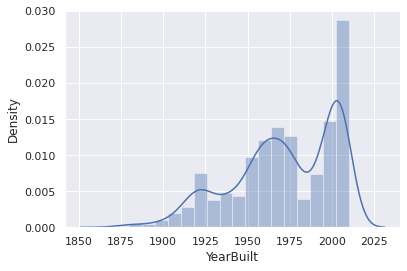

In [ ]:
#As per the requirement, lets plot some histograms

#YearBuilt
sns.distplot(df_train['YearBuilt'])


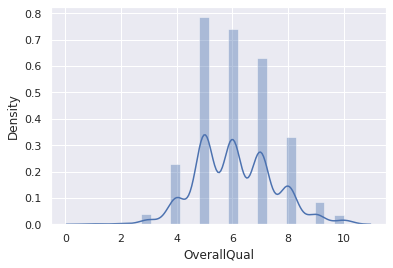

In [ ]:
#Checking histogram of Over all Quality
sns.distplot(df_train['OverallQual'])

## **Correlations between some significant categorical features and 'SalePrice'**

Box plots are excellent tools to visualize categorical distributions

(-0.5, 9.5, 0.0, 800000.0)

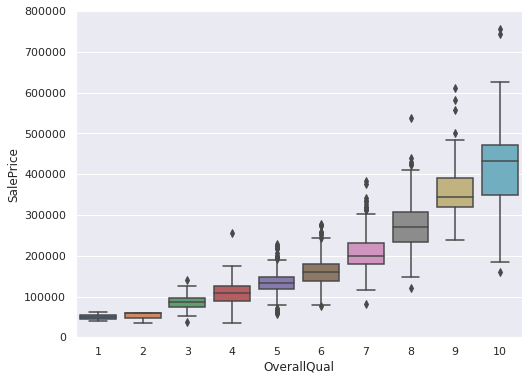

In [ ]:
# visualize correlations between OverallQual and SalePrice
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 3.5, 0.0, 800000.0)

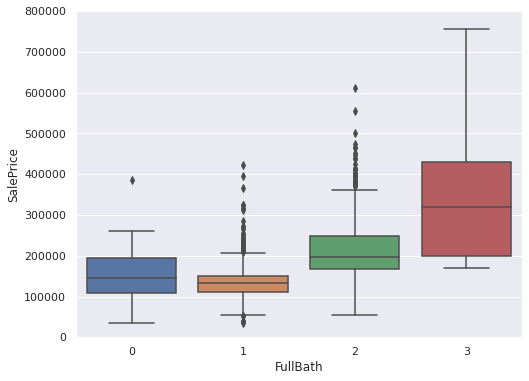

In [ ]:
# visualize correlations between FullBath and SalePrice

data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 4.5, 0.0, 800000.0)

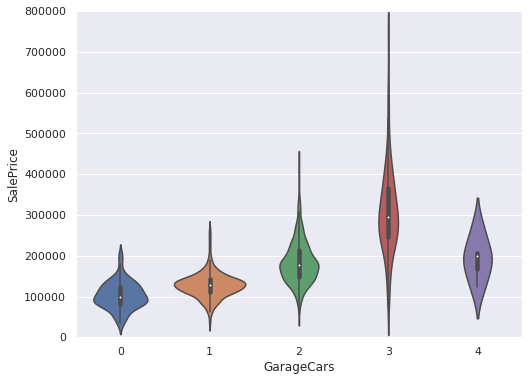

In [ ]:
# visualize correlations between GarageCars and SalePrice

data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


# **Data Cleaning**

Now that we deeply understand the underlying statistics of the dataset from our exploratory data analysis, lets begin cleaning the data for the future machine learning modeling.

In [ ]:
# Lets Check MISSING DATA
# create a table that displays count and percentage of data missing
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## **Plotting Features with Empty cells on Bar Chart**

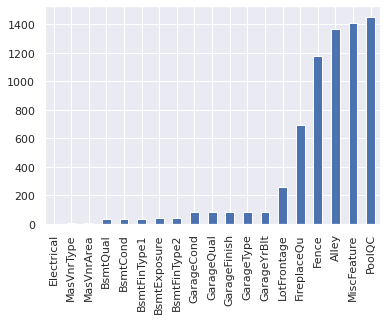

In [ ]:
#plot no. of empty cells
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## **Erasing Columns with Missing Values**

Following are some important observations that lead us to erase columns that has less importance in terms of their existance and eventually it will help us to draw more accurate conclusions:

> None of these variables seem to be very important and are not aspects in which we think about when buying a house, so we are definitely going to erase them i.e.  'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'GarageX', 'BsmtX',  'MasVnrArea', 'MasVnrType' etc.

> In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.



In [ ]:
# dealing with missing data

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

# Let's check no. of columns...
print(len(df_train.columns))

63


## ***ONE HOT ENCODING***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Getting Most Imp Features
df_train = df_train[imp_cols.values]
df_test = df_test[imp_cols.values]

#One Hot Encoding For OverAllQual Categorical Feature On Test And Train Data
enc = OneHotEncoder(handle_unknown='ignore')
enc_df_train = pd.DataFrame(enc.fit_transform(df_train[['OverallQual']]).toarray())
enc_df_train.columns = [ f'Qual {i+1}' for i in range(10)]

enc_df_test = pd.DataFrame(enc.fit_transform(df_test[['OverallQual']]).toarray())
enc_df_test.columns = [ f'Qual {i+1}' for i in range(10)]

# merge with main df on key values
df_train = df_train.join(enc_df_train)
df_train.drop(['OverallQual'], axis=1)

df_test = df_test.join(enc_df_test)
df_train.drop(['OverallQual'], axis=1)






,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Qual 1,Qual 2,Qual 3,Qual 4,Qual 5,Qual 6,Qual 7,Qual 8,Qual 9,Qual 10
0,208500,1710,2,548,856,856,2,8,2003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,181500,1262,2,460,1262,1262,2,6,1976,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,223500,1786,2,608,920,920,2,6,2001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,140000,1717,3,642,756,961,1,7,1915,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,250000,2198,3,836,1145,1145,2,9,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,2,460,953,953,2,7,1999,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,210000,2073,2,500,1542,2073,2,7,1978,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,266500,2340,1,252,1152,1188,2,9,1941,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458,142125,1078,1,240,1078,1078,1,5,1950,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **K-Fold Cross Validation / Model Selection**

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


print(df_train[['SalePrice']])
df_train_x = df_train.drop('SalePrice',axis=1).values
df_train_y = df_train['SalePrice'].values

df_test_x = df_test.drop('SalePrice',axis=1).values

kfold = model_selection.KFold(n_splits=10, random_state=200)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, df_train_x, df_train_y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

model_kfold.fit(df_train_x,df_train_y)
model_kfold.predict(df_test_x)
print(model_kfold.rank_)
#To BE Contd....




      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]
Accuracy: 79.49%
17
